# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Data

In [55]:
df = pd.read_csv("datasets/africa_food_prices.csv")

# Display the first four rows
df.head(4)

,Unnamed: 0,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price,mp_commoditysource
0,15427,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,4,2015,90.0,NaN
1,15428,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,5,2015,96.0,NaN
2,15429,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,6,2015,96.0,NaN
3,15430,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,7,2015,83.0,NaN


# Q1. Data Cleaning and Transformation

In [3]:
df.index

RangeIndex(start=0, stop=956779, step=1)

In [4]:
# Number of rows and columns in the dataset

df.shape

(956779, 19)

In [5]:
# What are the columns headers
df.columns

Index(['Unnamed: 0', 'country_id', 'country', 'state_id', 'state', 'market_id',
       'market', 'produce_id', 'produce', 'currency_id', 'currency', 'pt_id',
       'market_type', 'um_unit_id', 'quantity', 'month', 'year', 'price',
       'mp_commoditysource'],
      dtype='object')

## Handling Missing Values

In [6]:
# Check for Missing Values
df.isnull().sum()

Unnamed: 0                 0
country_id                 0
country                    0
state_id                   0
state                 126678
market_id                  0
market                     0
produce_id                 0
produce                    0
currency_id                0
currency                   0
pt_id                      0
market_type                0
um_unit_id                 0
quantity                   0
month                      0
year                       0
price                      0
mp_commoditysource    956779
dtype: int64

In [7]:
# Drop multiple Columns
df.drop(columns = ["mp_commoditysource","Unnamed: 0"], inplace = True)

In [8]:
df.head(2)

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price
0,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,4,2015,90.0
1,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,5,2015,96.0


In [9]:
# Display the rows with missing values in entire datasets
df[df.isnull().any(axis=1)]

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price
140847,50.0,Chad,0,NaN,1965,National Average,64,Rice (imported) - Retail,0.0,XAF,15,Retail,5,KG,11,2018,567.0
140848,50.0,Chad,0,NaN,1965,National Average,73,Millet - Retail,0.0,XAF,15,Retail,5,KG,10,2018,191.0
140849,50.0,Chad,0,NaN,1965,National Average,73,Millet - Retail,0.0,XAF,15,Retail,5,KG,11,2018,175.0
140850,50.0,Chad,0,NaN,1965,National Average,282,Sorghum (red) - Retail,0.0,XAF,15,Retail,5,KG,10,2018,172.0
140851,50.0,Chad,0,NaN,1965,National Average,282,Sorghum (red) - Retail,0.0,XAF,15,Retail,5,KG,11,2018,147.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889628,235.0,Swaziland,2784,NaN,2654,Manzini,432,Beans (sugar) - Retail,0.0,SZL,15,Retail,5,KG,5,2020,23.0
889629,235.0,Swaziland,2784,NaN,2654,Manzini,432,Beans (sugar) - Retail,0.0,SZL,15,Retail,5,KG,6,2020,22.5
889630,235.0,Swaziland,2784,NaN,2654,Manzini,432,Beans (sugar) - Retail,0.0,SZL,15,Retail,5,KG,7,2020,22.5
889631,235.0,Swaziland,2784,NaN,2654,Manzini,432,Beans (sugar) - Retail,0.0,SZL,15,Retail,5,KG,8,2020,22.5


## Filling missing 'State' values based on the corresponding 'country' values

In [10]:
# Display Rows with missing 'state' values before filling
missing_state_rows = df[df['state'].isnull()]
print("Rows with Missing 'state' Values")
print(missing_state_rows)

Rows with Missing 'state' Values
        country_id    country  state_id state  market_id            market  \
140847        50.0       Chad         0   NaN       1965  National Average   
140848        50.0       Chad         0   NaN       1965  National Average   
140849        50.0       Chad         0   NaN       1965  National Average   
140850        50.0       Chad         0   NaN       1965  National Average   
140851        50.0       Chad         0   NaN       1965  National Average   
...            ...        ...       ...   ...        ...               ...   
889628       235.0  Swaziland      2784   NaN       2654           Manzini   
889629       235.0  Swaziland      2784   NaN       2654           Manzini   
889630       235.0  Swaziland      2784   NaN       2654           Manzini   
889631       235.0  Swaziland      2784   NaN       2654           Manzini   
889632       235.0  Swaziland      2784   NaN       2654           Manzini   

        produce_id            

In [11]:
# Group by 'country' and fill missing 'state' values with most frequent state in each country

df['state'] = df.groupby('country')['state'].transform(lambda x: x.fillna(x.mode()[0]
                                                                          if not x.mode().empty else "Unknown"))

In [12]:
# Display Rows with missing 'state' values after filling

missing_state_rows_after = df[df['state'].isnull()]
print("\nRows with Missing 'state' Values After Filling:")
print(missing_state_rows_after)



Rows with Missing 'state' Values After Filling:
Empty DataFrame
Columns: [country_id, country, state_id, state, market_id, market, produce_id, produce, currency_id, currency, pt_id, market_type, um_unit_id, quantity, month, year, price]
Index: []


In [13]:
df.isnull().sum()

country_id     0
country        0
state_id       0
state          0
market_id      0
market         0
produce_id     0
produce        0
currency_id    0
currency       0
pt_id          0
market_type    0
um_unit_id     0
quantity       0
month          0
year           0
price          0
dtype: int64

## Data Types Conversion

In [14]:
df.dtypes

country_id     float64
country         object
state_id         int64
state           object
market_id        int64
market          object
produce_id       int64
produce         object
currency_id    float64
currency        object
pt_id            int64
market_type     object
um_unit_id       int64
quantity        object
month            int64
year             int64
price          float64
dtype: object

In [15]:
# General Dataset Description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956779 entries, 0 to 956778
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country_id   956779 non-null  float64
 1   country      956779 non-null  object 
 2   state_id     956779 non-null  int64  
 3   state        956779 non-null  object 
 4   market_id    956779 non-null  int64  
 5   market       956779 non-null  object 
 6   produce_id   956779 non-null  int64  
 7   produce      956779 non-null  object 
 8   currency_id  956779 non-null  float64
 9   currency     956779 non-null  object 
 10  pt_id        956779 non-null  int64  
 11  market_type  956779 non-null  object 
 12  um_unit_id   956779 non-null  int64  
 13  quantity     956779 non-null  object 
 14  month        956779 non-null  int64  
 15  year         956779 non-null  int64  
 16  price        956779 non-null  float64
dtypes: float64(3), int64(7), object(7)
memory usage: 124.1+ MB


# Q2. Exploratory Data Analysis (EDA)

In [16]:
# Descriptive statistics
df.describe()

,country_id,state_id,market_id,produce_id,currency_id,pt_id,um_unit_id,month,year,price
count,956779.000000,956779.000000,956779.000000,956779.000000,956779.0,956779.000000,956779.000000,956779.000000,956779.000000,9.567790e+05
mean,1961.192782,22287.911831,1392.594222,186.141214,0.0,14.926716,14.017183,6.381471,2015.704015,4.128833e+03
std,10404.034922,98565.608270,1027.751212,165.401303,0.0,0.263570,24.437728,3.418025,4.603829,1.381840e+05
min,4.000000,0.000000,101.000000,50.000000,0.0,14.000000,5.000000,1.000000,1990.000000,0.000000e+00
25%,90.000000,1836.000000,528.000000,67.000000,0.0,15.000000,5.000000,3.000000,2013.000000,6.500000e+01
50%,155.000000,2209.000000,1078.000000,105.000000,0.0,15.000000,5.000000,6.000000,2017.000000,2.505714e+02
75%,205.000000,21971.000000,2281.000000,262.000000,0.0,15.000000,9.000000,9.000000,2020.000000,7.221005e+02
max,70001.000000,900003.000000,6081.000000,887.000000,0.0,17.000000,175.000000,12.000000,2021.000000,1.725000e+07


### Univariate Analysis

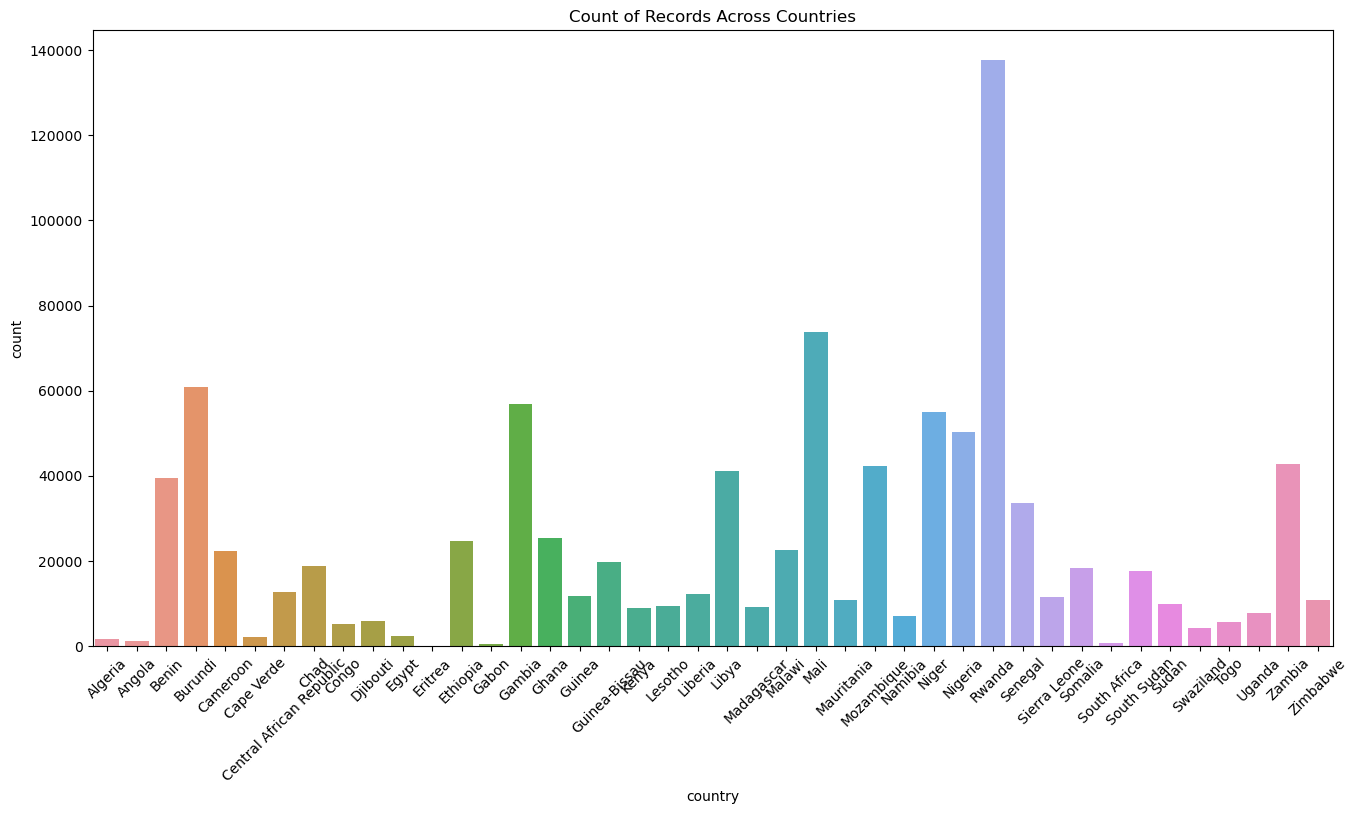

In [19]:
# Countplot for categorical variables
plt.figure(figsize=(16,8))
sns.countplot(x='country', data=df)
plt.title('Count of Records Across Countries')
plt.xticks(rotation=45)
plt.show()


### Bivariate Analysis

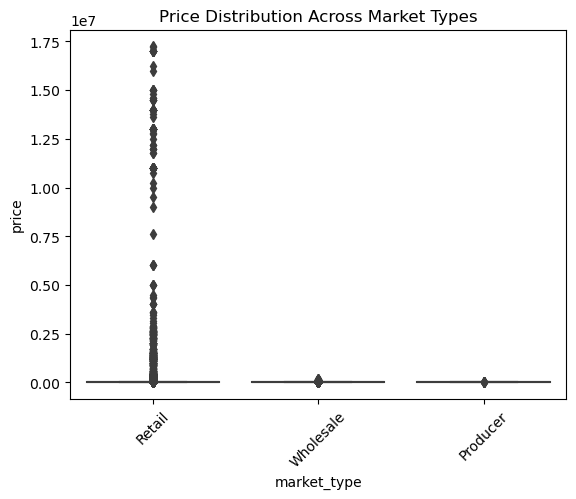

In [20]:
# Boxplot for price by market type
sns.boxplot(x='market_type', y='price', data=df)
plt.title('Price Distribution Across Market Types')
plt.xticks(rotation=45)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

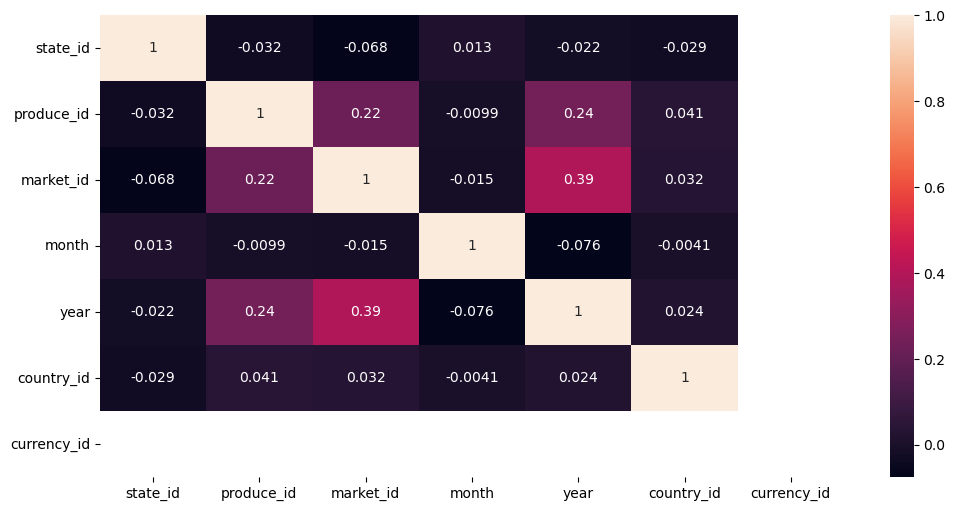

In [18]:
# Heat map to check correlation
plt.figure(figsize=(12, 6))
sns.heatmap(df[["state_id","produce_id",
                "market_id","month","year","country_id","currency_id"]].corr(),
            annot=True)
plt.show

# Q3. Five Research Questions from the Datasets

    1. What are the most common commodities purchased across different countries and markets?
    
    2. How do prices vary between different market types (Retail/Wholesale/Producer/Farm Gate)?
    
    3. Is there a seasonal pattern in food prices? How do prices fluctuate across months and years?
    
    4. Are there any notable differences in prices between countries or localities?
    
    5. What is the relationship between the quantity exchanged and the price paid?

# Q4. Trend Analysis and Visualization

In [54]:
# 1. Most common commodities purchased across different countries and markets
common_commodities = df['market'].value_counts().nlargest(10)
print(common_commodities)

market
Serrekunda          4130
Banjul              4127
Brikama             4111
Basse Santa su      4028
Farafenni           3937
Soma                3724
Bansang             3559
Kaur Wharf Town     3513
National Average    3446
Gasarenda           3022
Name: count, dtype: int64


In [30]:
# 2. Prices variation between different market types
market_type_prices = df.groupby('market_type')['price'].mean()
print(market_type_prices)

market_type
Producer      666.338710
Retail       3767.706512
Wholesale    8671.729344
Name: price, dtype: float64


Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='month')
[3998.54611986 4150.51549269 4254.50775278 4126.43235258 3954.71457843
 4150.21830138 4205.18376174 4268.54873049 4151.36154227 4311.47575789
 4149.38124671 3828.38468402]


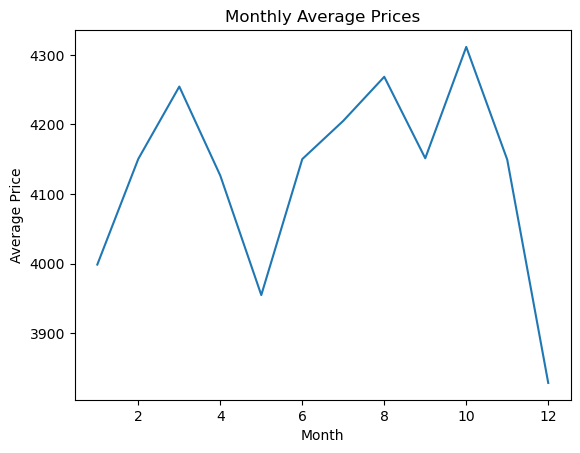

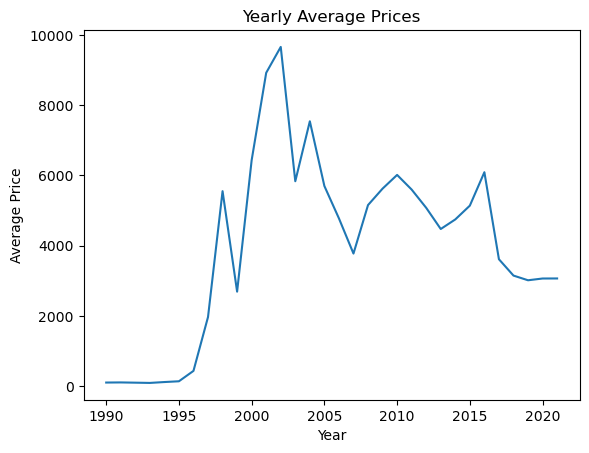

In [44]:
# 3. Seasonal pattern in food prices
monthly_prices = df.groupby('month')['price'].mean()
yearly_prices = df.groupby('year')['price'].mean()

# Check data types and non-null counts
print(monthly_prices.index)
print(monthly_prices.values)

plt.plot(monthly_prices.index, monthly_prices.values)
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Monthly Average Prices')
plt.show()

plt.plot(yearly_prices.index, yearly_prices.values)
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Yearly Average Prices')
plt.show()

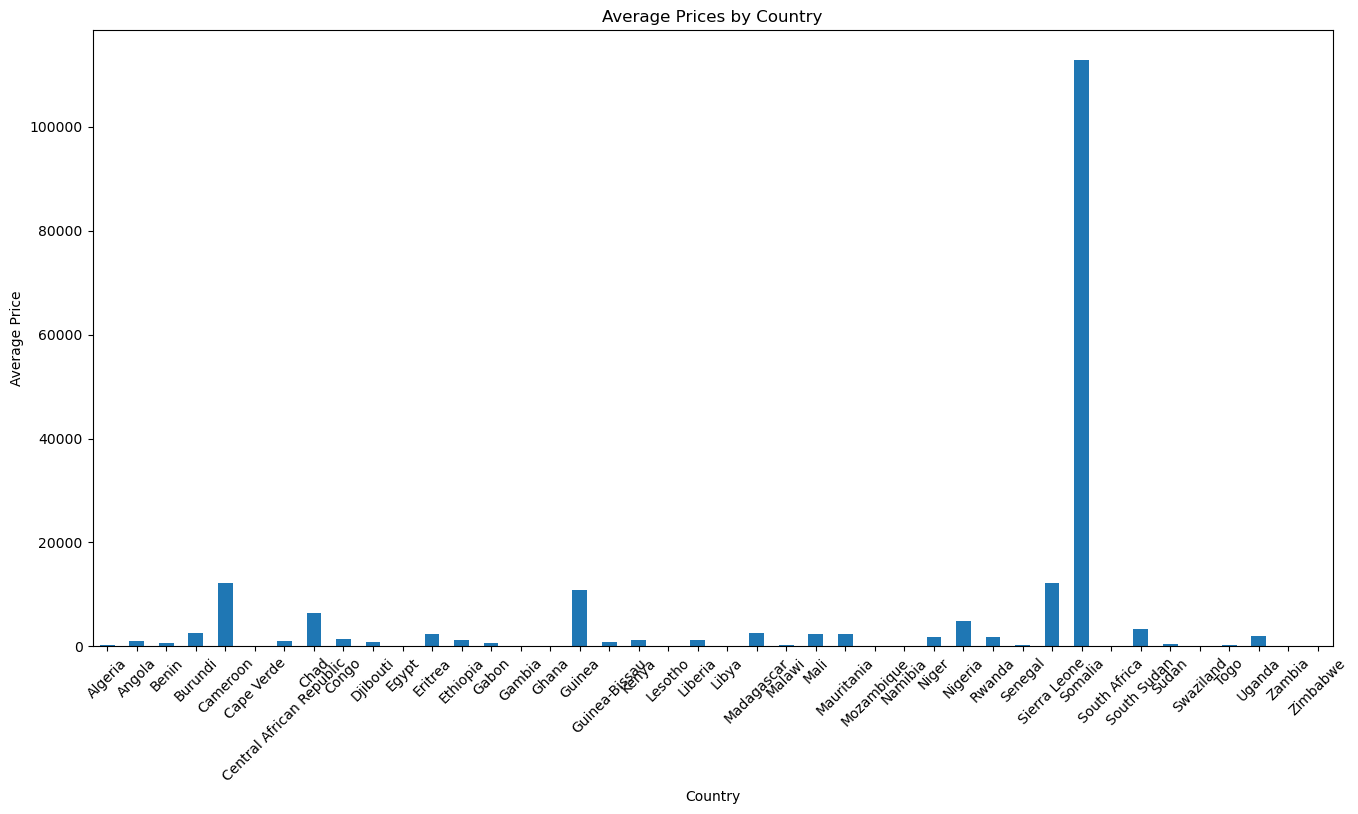

In [47]:
# 4. Notable differences in prices between countries or localities
country_prices = df.groupby('country')['price'].mean()
locality_prices = df.groupby('state_id')['price'].mean()

# Example of bar chart for country prices
plt.figure(figsize=(16,8))
country_prices.plot(kind='bar', xlabel='Country', ylabel='Average Price', title='Average Prices by Country')
plt.xticks(rotation=45)
plt.show()

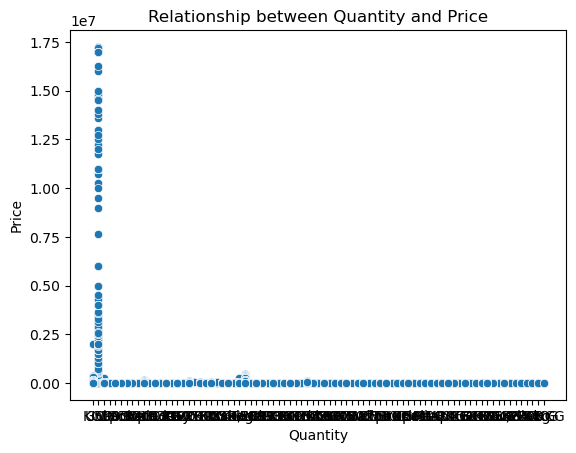

In [51]:
# 5. Relationship between quantity exchanged and price paid
sns.scatterplot(data=df, x='quantity', y='price')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Relationship between Quantity and Price')
plt.show()